In [1]:
%matplotlib inline
import os
from glob import glob

import calendar
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import matplotlib.path as mpath

import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cmocean

import util

In [4]:
dsobs = xr.open_zarr('/glade/p/cgd/oce/projects/krill-cesm-le/data/oisst-avhrr-v02r01.1991-2019_DJF.POP_gx1v6.zarr')
dsobs

,Array,Chunk
Bytes,27.53 MB,983.04 kB
Shape,"(28, 384, 320)","(1, 384, 320)"
Count,29 Tasks,28 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,27.53 MB,983.04 kB
Shape,"(28, 384, 320)","(1, 384, 320)"
Count,29 Tasks,28 Chunks
Type,float64,numpy.ndarray
,Array,Chunk


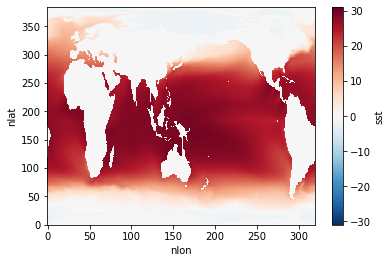

In [27]:
dsobs.sst.mean('time').plot()

In [31]:
masked_area = dsobs.where(dsobs.nlat <= -45)
masked_area

,Array,Chunk
Bytes,27.53 MB,983.04 kB
Shape,"(28, 384, 320)","(1, 384, 320)"
Count,58 Tasks,28 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,27.53 MB,983.04 kB
Shape,"(28, 384, 320)","(1, 384, 320)"
Count,58 Tasks,28 Chunks
Type,float64,numpy.ndarray
,Array,Chunk


In [39]:
lat = dsobs.nlat
lon = dsobs.nlon
lat

<xarray.DataArray 'nlat' (nlat: 384)>
array([  0,   1,   2, ..., 381, 382, 383])
Dimensions without coordinates: nlat

In [45]:
lon, lat = dsp.isel(nlat=slice(0, 100)), dsp.isel(nlat=slice(0, 100)) 
lon

,Array,Chunk
Bytes,7.17 MB,256.00 kB
Shape,"(28, 100, 320)","(1, 100, 320)"
Count,57 Tasks,28 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,7.17 MB,256.00 kB
Shape,"(28, 100, 320)","(1, 100, 320)"
Count,57 Tasks,28 Chunks
Type,float64,numpy.ndarray
,Array,Chunk


TypeError: cannot directly convert an xarray.Dataset into a numpy array. Instead, create an xarray.DataArray first, either with indexing on the Dataset or by invoking the `to_array()` method.

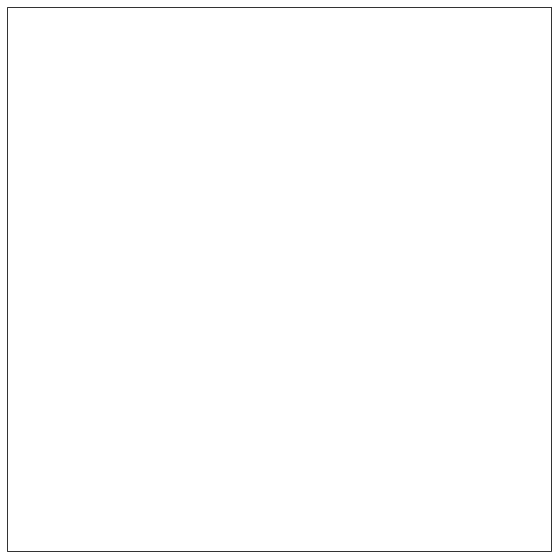

In [46]:
#PLOT IT
dsp = dsobs
lon, lat = dsp.isel(nlat=slice(0, 100)), dsp.isel(nlat=slice(0, 100)) 
field = dsp.sst.mean('time') nlat=slice(0, 100))
#field = np.log(dsp.Chl_surf.isel(month=0, nlat=slice(0, 100)))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())
ax.set_extent([180, -180, -75,  -50], crs=ccrs.PlateCarree())

cmap = cmocean.cm.haline
#levels = np.logspace(-2, 1, 16)
levels=[-0.043, 0, 0.0028, 0.066]


#norm = colors.LogNorm(vmin=0.01, vmax=20.)
#norm = colors.LogNorm(vmin=-0.043, vmax=0.066)


cf = ax.contourf(lon, lat, field,
                 levels=levels,
                 cmap=cmap,
                 extend='both',
#                 norm=norm,
#                 vmin=-0.043, vmax=0.066,
                 transform=ccrs.PlateCarree())

ax.coastlines('50m')
ax.gridlines().n_steps = 90  ## this makes them rounder
#plt.title('January Model Output np.log ')
plt.title('December: Model 1986 - 2005')

#plt.title('January Model Output')
fig.colorbar(cf, ax=ax)
#plt.savefig('January-CESM-Chl-map.png')

In [ ]:
v = 'sst'
#limYMin = 0
limYMax = 0.5


#####################################
fig = plt.figure(figsize=(9, 8))
gs = gridspec.GridSpec(2,1)

ax = fig.add_subplot(gs[0, 0])
ax.set_xlim((1920, 2100))

for m_id in ds_djf_regional.member_id:
    var_i = ds_djf_regional[v].sel(member_id=m_id, region=region)
    ax.plot(ds_djf_regional.time, var_i, '-', linewidth=0.8, color = 'grey', alpha = 0.4, )
    
ax.plot(ds_djf_regional.time, ds_djf_regional[v].sel(region=region).mean('member_id'),
        '-', linewidth=1, color='k')

ax.set_ylim([limYMin, limYMax])
#ax.set_ylabel(f'{ds_djf_regional[v].long_name} [{ds_djf_regional[v].units}]', fontsize = 18)
ax.set_ylabel(f'[{ds_djf_regional[v].units}]', fontsize = 18)
ax.set_xlabel('Year', fontsize = 18)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_title(f'{ds_djf_regional[v].long_name}: {region}', fontsize = 18)

title = (f'{region} {ds_djf_regional[v].long_name}')
path = 'figures/timeseries/'
#file = '.png'
file = '.pdf'

plt.savefig(path + title + file, bbox_inches='tight')